INFORMAÇÕES GERAIS**

**Objetivos:**

*   conhecer o processo de uso da OpenCV em notebooks Python no Google Colab
*   conhecer funções essenciais da OpenCV



O primeiro passo é importar o módulo **cv2** (já instalado no Google Colab). Como vamos visualizar imagens, importamos também o módulo **matplotlib** e configuramos sua visualização para inline (dentro no notebook).

In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

Normalmente, toda pipeline de processamento em OpenCV começa com uma a**quisição (ou captura)** de imagem ou vídeo. Para isto, é necessário definir um ponto de aquisição ou captura.

Definido o ponto de aquisição, fazemos a leitura da imagem e eventuais processamentos. No caso da imagem abaixo, que está no sistema de cores BGR (RGB invertido), fizemos sua conversão para níveis de cinza (grayscale).

In [3]:
img=cv2.imread('lena.png')
gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

Finalmente, a imagem pode ser exibida... eventualmente, pode ser necessário o uso de **mapas de cores (colormaps)** específicos.

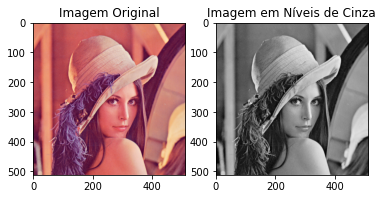

In [4]:
fig,ax=plt.subplots(ncols=2)
ax[0].imshow(img[...,::-1])  #BGR para RGB
ax[0].set_title('Imagem Original')
ax[1].imshow(gray_img,cmap=plt.cm.gray)
ax[1].set_title('Imagem em Níveis de Cinza')
plt.show()

# **EXERCÍCIO 1**

Converter a imagem img para binária (branco e preto), armazená-la numa nova variável e fazer sua exibição.


numpy.ndarray

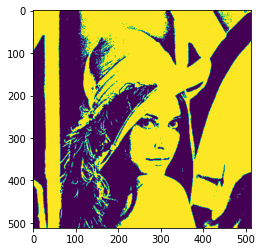

In [17]:
#faça sua implementação aqui
bin_img = cv2.threshold(gray_img, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
plt.imshow(bin_img)
cv2.imwrite('bw_image.png', bin_img)
type(bin_img)
#Referência: https://docs.opencv.org/4.5.2/d6/d00/tutorial_py_root.html

# **EXERCÍCIO 2**

Pegue a imagem preto e branco e transforme em uma matriz Numpy Array.

Consulta: 

https://www.geeksforgeeks.org/how-to-convert-images-to-numpy-array/

https://docs.opencv.org/4.x/d3/df2/tutorial_py_basic_ops.html

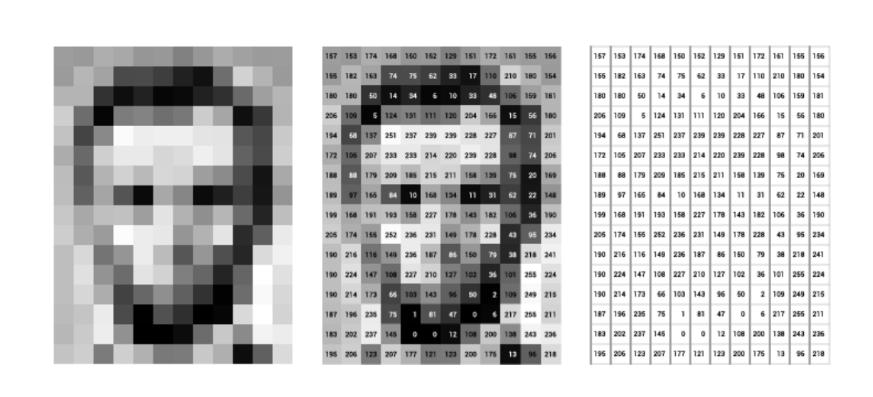

In [16]:
from tensorflow.keras.preprocessing.image import img_to_array

img = img_to_array(bin_img)
type(img)

numpy.ndarray

# **EXERCÍCIO 3**

Tente criar uma rede neural para receber imagens e classificar o tipo de imagem.

Dataset: https://www.kaggle.com/datasets/scolianni/mnistasjpg

Discuta a solução com o professor caso necessário.


In [19]:
import os 

In [76]:
PATH = "mnist/trainingSet/trainingSet/"
X = []
y = []
for number in os.listdir(PATH):
    for img_path in os.listdir(f"{PATH}{number}"):
        img = cv2.imread(f"{PATH}{number}/{img_path}")
        gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        X.append(gray_img/255)
        y.append(int(number))

In [77]:
from sklearn.model_selection import train_test_split
import numpy as np

X = np.asarray(X)
y = np.asarray(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=404)
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (37800, 28, 28)
y_train shape:  (37800,)
X_test shape:  (4200, 28, 28)
y_test shape:  (4200,)


In [64]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

hist = model.fit(X_train, y_train, epochs=30)

Epoch 1/30
1182/1182 [==============================] - 2s 1ms/step - loss: 2.7041 - accuracy: 0.1433
Epoch 2/30
1182/1182 [==============================] - 2s 1ms/step - loss: 2.0555 - accuracy: 0.2074
Epoch 3/30
1182/1182 [==============================] - 2s 1ms/step - loss: 1.9256 - accuracy: 0.2513
Epoch 4/30
1182/1182 [==============================] - 2s 1ms/step - loss: 1.8448 - accuracy: 0.2770
Epoch 5/30
1182/1182 [==============================] - 2s 1ms/step - loss: 1.8005 - accuracy: 0.2927
Epoch 6/30
1182/1182 [==============================] - 1s 1ms/step - loss: 1.7714 - accuracy: 0.2957
Epoch 7/30
1182/1182 [==============================] - 2s 1ms/step - loss: 1.7297 - accuracy: 0.3140
Epoch 8/30
1182/1182 [==============================] - 2s 1ms/step - loss: 1.6213 - accuracy: 0.3578
Epoch 9/30
1182/1182 [==============================] - 1s 1ms/step - loss: 1.5555 - accuracy: 0.3738
Epoch 10/30
1182/1182 [==============================] - 2s 1ms/step - loss: 1.504

In [85]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, Conv2D, Flatten, MaxPooling2D, Activation

model = Sequential()

model.add(Conv2D(64, (3,3), input_shape = (28, 28, 1), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(32, activation="relu"))

model.add(Dense(10, activation="softmax"))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 flatten_18 (Flatten)        (None, 10816)             0         
                                                                 
 dense_32 (Dense)            (None, 32)                346144    
                                                                 
 dense_33 (Dense)            (None, 10)                330       
                                                                 
Total params: 347,114
Trainable params: 347,114
Non-trainable params: 0
_______________________________________________

In [86]:
hist2 = model.fit(X_train, y_train, epochs=30, batch_size = 32)

Epoch 1/30
1182/1182 [==============================] - 10s 8ms/step - loss: 0.2126 - accuracy: 0.9373
Epoch 2/30
1182/1182 [==============================] - 10s 8ms/step - loss: 0.0690 - accuracy: 0.9794
Epoch 3/30
1182/1182 [==============================] - 10s 8ms/step - loss: 0.0477 - accuracy: 0.9853
Epoch 4/30
1182/1182 [==============================] - 10s 8ms/step - loss: 0.0351 - accuracy: 0.9883
Epoch 5/30
1182/1182 [==============================] - 10s 8ms/step - loss: 0.0255 - accuracy: 0.9917
Epoch 6/30
1182/1182 [==============================] - 10s 8ms/step - loss: 0.0202 - accuracy: 0.9930
Epoch 7/30
1182/1182 [==============================] - 10s 8ms/step - loss: 0.0153 - accuracy: 0.9950
Epoch 8/30
1182/1182 [==============================] - 10s 8ms/step - loss: 0.0129 - accuracy: 0.9957
Epoch 9/30
1182/1182 [==============================] - 10s 8ms/step - loss: 0.0096 - accuracy: 0.9972
Epoch 10/30
1182/1182 [==============================] - 10s 8ms/step - l